## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [1]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('german.csv', sep=';')

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42, stratify=y)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

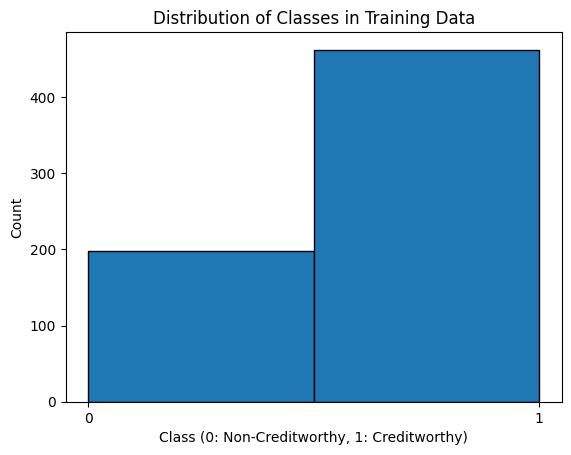

In [3]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [6]:
# Обучение Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

rf_params = {
    'n_estimators': [220],
    'min_samples_leaf': [7],
    'criterion': ['entropy'],
    'max_depth': [7],
    'min_samples_split': [15],
}

# Кросс-валидация
stratified_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# Поиск лучших параметров
rf_grid = GridSearchCV(rf_model, rf_params, scoring='roc_auc', cv=stratified_kfold)
rf_grid.fit(X_train_scaled, y_train)
rf_best_model = rf_grid.best_estimator_

# Прогноз и метрики для Random Forest
rf_pred_proba = rf_best_model.predict_proba(X_test_scaled)[:, 1]
rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)
rf_accuracy = accuracy_score(y_test, rf_best_model.predict(X_test_scaled))
rf_precision = precision_score(y_test, rf_best_model.predict(X_test_scaled))
rf_recall = recall_score(y_test, rf_best_model.predict(X_test_scaled))

print("\nRandomForest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

gb_params = {
    'n_estimators': [300],
    'learning_rate': [0.01],
    'max_depth': [7],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'subsample': [0.8],
    'loss': ['exponential']
}

# Кросс-валидация
stratified_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# Поиск лучших параметров
gb_grid = GridSearchCV(gb_model, gb_params, scoring='roc_auc', cv=stratified_kfold)
gb_grid.fit(X_train_scaled, y_train)
gb_best_model = gb_grid.best_estimator_

# Прогноз и метрики для Gradient Boosting
gb_pred_proba = gb_best_model.predict_proba(X_test_scaled)[:, 1]
gb_roc_auc = roc_auc_score(y_test, gb_pred_proba)
gb_accuracy = accuracy_score(y_test, gb_best_model.predict(X_test_scaled))
gb_precision = precision_score(y_test, gb_best_model.predict(X_test_scaled))
gb_recall = recall_score(y_test, gb_best_model.predict(X_test_scaled))

# Вывод
print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")


RandomForest метрики:
ROC AUC: 0.81
Accuracy: 0.78
Precision: 0.86
Recall: 0.82

Gradient Boosting метрики:
ROC AUC: 0.81
Accuracy: 0.79
Precision: 0.80
Recall: 0.93


In [4]:
# Обучение MLP нейронной сети, 
mlp_best_model = MLPClassifier(random_state=42, hidden_layer_sizes=(100, 200), activation='logistic', solver='adam', max_iter=200, alpha = 0.01, learning_rate_init=0.001, learning_rate='adaptive')
mlp_best_model.fit(X_train_scaled, y_train)

# Прогноз и метрики для MLP нейронной сети
mlp_pred_proba = mlp_best_model.predict_proba(X_test_scaled)[:, 1]
mlp_roc_auc = roc_auc_score(y_test, mlp_pred_proba)
mlp_accuracy = accuracy_score(y_test, mlp_best_model.predict(X_test_scaled))
mlp_precision = precision_score(y_test, mlp_best_model.predict(X_test_scaled))
mlp_recall = recall_score(y_test, mlp_best_model.predict(X_test_scaled))

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.81
Accuracy: 0.77
Precision: 0.78
Recall: 0.92


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели